#Cancer Dataset
The objective for analyzing this dataset is to predict the diagnosis of having cancer based on physiological measurements.

##Importing of Libraries

In [89]:
# Import libraries and mount drive
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import sklearn as sks
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Data Cleaning

In [90]:
# Load the dataset
cancer_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/cancer.csv')
cancer_df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [91]:
# Check the information of the dataframe
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [92]:
# Determine value counts of target vector
cancer_df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

##Data Visualization

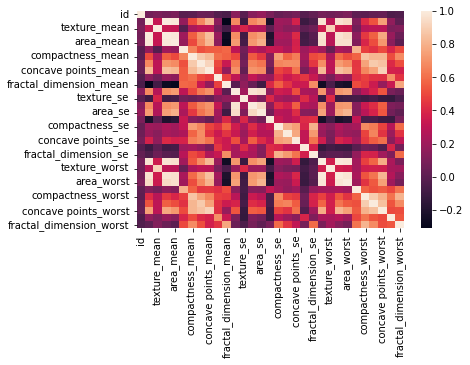

In [93]:
# Heatmap
sns.heatmap(cancer_df.corr())

##Machine Learning

In [94]:
# Define X and y
X = cancer_df.drop(columns=['diagnosis'])
y = cancer_df['diagnosis']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=101)

In [95]:
# Select columns
num_selector = make_column_selector(dtype_include='number')

num_columns = num_selector(X_train)

num_data = X_train[num_columns]

In [96]:
# Instantiate scaler
scaler = StandardScaler()

# Fit and transform to the Xtrain and Xtest
train_img = scaler.fit_transform(num_data)

# Make imputer pipeline for imputer, scaler and ohe
num_pipe = make_pipeline(scaler)

In [97]:
# Make a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_pipe, num_selector)]
)
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f9d9c545790>)])

In [98]:
# Fit with the Xtrain
X_train = pd.DataFrame(preprocessor.fit_transform(X_train))

# Fit transformer with the Xtest
X_test = pd.DataFrame(preprocessor.transform(X_test))

###Decision Tree Classifier

In [99]:
# Import the model
from sklearn.tree import DecisionTreeClassifier

# Instantiate Decision Tree Classifier
dcf = DecisionTreeClassifier(random_state=101)

In [100]:
# Create a pipeline for the random forest
dcf_pipe = Pipeline(
    steps=[('preprocessor', preprocessor), ('decision tree classifier', dcf)]
)

In [101]:
# Fit the model with the training data
dcf_pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f9d9c545790>)])),
                ('decision tree classifier',
                 DecisionTreeClassifier(random_state=101))])

In [102]:
# Predict with the test set
predictions_dcf = dcf_pipe.predict(X_test)

In [103]:
# Evaluate the model
dcf_train_score = dcf_pipe.score(X_train, y_train)
dcf_test_score = dcf_pipe.score(X_test, y_test)
print(f"Train score is {dcf_train_score}")
print(f"Test score is {dcf_test_score}")

Train score is 1.0
Test score is 0.916083916083916


In [104]:
# Get the depth
depth = dcf.get_depth()
print(depth)

# Get the leaf nodes
leaf_nodes = dcf.get_n_leaves()
print(leaf_nodes)

7
22


In [105]:
# Initiate the list of depth
max_depth_range = list(range(1,7))

# Initiate an empty list
r2 = list()

# Create a for loop to fill out the list r2
for values in max_depth_range:
  dcf_pipe.fit(X_train, y_train)
  test_score = dcf_pipe.score(X_test, y_test)
  r2.append(test_score)

Text(0, 0.5, 'R2')

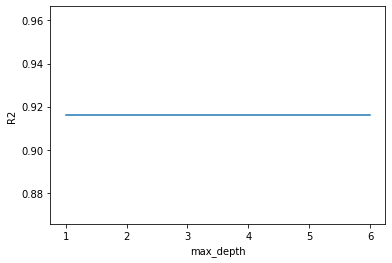

In [106]:
# Plot r2 vs. max depth
plt.plot(max_depth_range, r2)
plt.xlabel('max_depth')
plt.ylabel('R2')

### Bagging Classifier

In [107]:
# Import the model
from sklearn.ensemble import BaggingClassifier

# Instantiate the classifier
bc = BaggingClassifier(random_state=101)

In [108]:
# Create a pipeline for the random forest
bc_pipe = Pipeline(
    steps=[('preprocessor', preprocessor), ('bagging classifier', bc)]
)

In [109]:
# Fit the model with the training data
bc_pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f9d9c545790>)])),
                ('bagging classifier', BaggingClassifier(random_state=101))])

In [110]:
# Predict with the test set
predictions_bc = bc_pipe.predict(X_test)

In [111]:
# Evaluate the model
bc_train_score = bc_pipe.score(X_train, y_train)
bc_test_score = bc_pipe.score(X_test, y_test)
print(f"Train score is {bc_train_score}")
print(f"Test score is {bc_test_score}")

Train score is 0.9976525821596244
Test score is 0.9790209790209791


###Random Forest Classifier

In [112]:
# Import the model
from sklearn.ensemble import RandomForestClassifier

# Instantiate Random Forest
rf_class = RandomForestClassifier(random_state=101)

In [113]:
# Create a pipeline for the random forest
rf_class_pipe = Pipeline(
    steps=[('preprocessor', preprocessor), ('random forest classifier', rf_class)]
)

In [114]:
# Fit the model with the training data
rf_class_pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f9d9c545790>)])),
                ('random forest classifier',
                 RandomForestClassifier(random_state=101))])

In [115]:
# Predict with the test set
predictions_rf_class = rf_class_pipe.predict(X_test)

In [116]:
# Evaluate the model
rf_class_train_score = rf_class.score(X_train, y_train)
rf_class_test_score = rf_class.score(X_test, y_test)
print(f"Train score is {rf_class_train_score}")
print(f"Test score is {rf_class_test_score}")

Train score is 1.0
Test score is 0.965034965034965


###Confusion Matrix

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


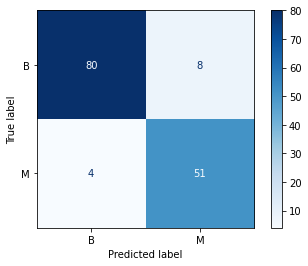

In [117]:
# Import confusion matrix for decision tree classifier
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(dcf_pipe, X_test, y_test, cmap = 'Blues')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


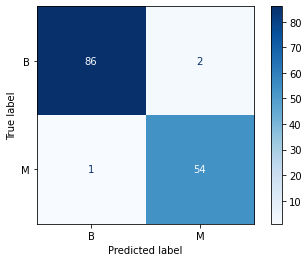

In [118]:
# Import confusion matrix for bagging classifier
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(bc_pipe, X_test, y_test, cmap = 'Blues')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


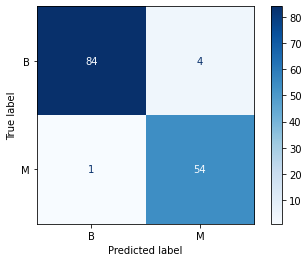

In [119]:
# Import confusion matrix for random forest classifier
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(rf_class_pipe, X_test, y_test, cmap = 'Blues')

In [120]:
# Confusion matrix for decision tree classifier
from sklearn import metrics
cm = metrics.confusion_matrix(y_test.values, predictions_dcf)
cm

array([[80,  8],
       [ 4, 51]])

In [121]:
# flatten array
cm.ravel()

array([80,  8,  4, 51])

In [122]:
# unpacking
tn, fp, fn, tp = cm.ravel()

In [123]:
# Accuracy of decision tree classifier
accuracy_dcf = (tp + tn)/(tp + fp + fn + tn) * 100
print(f"The accuracy of Decision Tree Classifier is {accuracy_dcf}%")

The accuracy of Decision Tree Classifier is 91.6083916083916%


In [124]:
# Confusion matrix for bagging classifier
cm = metrics.confusion_matrix(y_test.values, predictions_bc)
cm

array([[86,  2],
       [ 1, 54]])

In [125]:
# flatten array
cm.ravel()

array([86,  2,  1, 54])

In [126]:
# unpacking
tn, fp, fn, tp = cm.ravel()

In [127]:
# Accuracy of bagging classifier
accuracy_bc = (tp + tn)/(tp + fp + fn + tn) * 100
print(f"The accuracy of Bagging Classifier is {accuracy_bc}%")

The accuracy of Bagging Classifier is 97.9020979020979%


In [128]:
# Confusion matrix for random forest classifier
cm = metrics.confusion_matrix(y_test.values, predictions_rf_class)
cm

array([[84,  4],
       [ 1, 54]])

In [129]:
# flatten array
cm.ravel()

array([84,  4,  1, 54])

In [130]:
# unpacking
tn, fp, fn, tp = cm.ravel()

In [131]:
# Accuracy of random forest classifier
accuracy_rf = (tp + tn)/(tp + fp + fn + tn) * 100
print(f"The accuracy of Random Forest Classifier is {accuracy_rf}%")

The accuracy of Random Forest Classifier is 96.5034965034965%


##Conclusion

1. The accuracies of the models were as follows:

  Decision Tree Classifier - 91.61%

  Bagging Classifier - 97.90%

  Random Forest Classifier - 96.50%


2. Malignant condition was considered as the positive in the dataset

3. The number of false positives are:

  Decision Tree Classifier: 8

  Bagging Classifier: 2

  Random Forest Classifier: 4

4. The number of false negatives are:

  Decision Tree Classifier: 4

  Bagging Classifier: 1

  Random Forest Classifier: 1

5. For the dataset, false negative is more problematic since it has tendency to ignore real patients of cancer.
